<a href="https://colab.research.google.com/github/evymonteiro/ARTE_DOS_DADOS/blob/main/Trabalho2/TRABALHO_2_ARTE_DOS_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Inserindo os Dados**

In [7]:
# Bibliotecas iniciais
import pandas as pd
from google.colab import files

# Upload dos arquivos
uploaded = files.upload()

# o primeiro arquivo na lista é o 'dataset'
# e o segundo é o 'dataset_TEST'.

nomes_arquivos = list(uploaded.keys())

# Pega o primeiro e o segundo arquivo da lista.

nome_df = nomes_arquivos[0]
nome_df_teste = nomes_arquivos[1]

# Lê o arquivo de treino e armazena.
df = pd.read_csv(nome_df)

# Lê o arquivo de teste e armazena no DataFrame 'df_teste'.
df_teste = pd.read_csv(nome_df_teste)

# Analisando as 5 primeiras linhas do dataframe para verificar a importação.
print(df.head())
print(df_teste.head())

Saving 1_car_insurance_premium_dataset_.csv to 1_car_insurance_premium_dataset_.csv
Saving 2_car_insurance_premium_dataset_TEST.csv to 2_car_insurance_premium_dataset_TEST.csv
   Driver Age  Driver Experience  Previous Accidents  \
0          56                 32                   4   
1          46                 19                   0   
2          32                 11                   4   
3          60                  0                   4   
4          25                  7                   0   

   Annual Mileage (x1000 km)  Car Manufacturing Year  Car Age  \
0                         17                    2002       23   
1                         21                    2025        0   
2                         15                    2020        5   
3                         19                    1991       34   
4                         13                    2005       20   

   Insurance Premium ($)  
0                 488.35  
1                 486.15  
2              

**Explorando os dados**

In [9]:
import pandas as pd

def analise_exploratoria(dataframe, nome_do_df):
    """
    Análise exploratória inicial para um df.

    """
    print(f"--- Análise Exploratória para: {nome_do_df} ---")

    # Visão geral da estrutura (info())
    print("\n1. Visão geral da estrutura (info()):")
    dataframe.info()

    # Análise de valores nulos
    print("\n2. Valores nulos por coluna:")
    valores_nulos = dataframe.isnull().sum()
    porcentagem_nulos = (dataframe.isnull().sum() / len(dataframe)) * 100
    df_nulos = pd.DataFrame({'Valores Nulos': valores_nulos, 'Porcentagem (%)': porcentagem_nulos})

    if df_nulos['Valores Nulos'].sum() == 0:
        print("Não existem valores Nulos ou NA ou vazios.")
    else:
        print(df_nulos[df_nulos['Valores Nulos'] > 0].sort_values(by='Porcentagem (%)', ascending=False))

    # Análise de valores únicos
    print("\n3. Valores únicos por coluna:")
    for coluna in dataframe.columns:
        num_unicos = dataframe[coluna].nunique()
        print(f"\n- Coluna '{coluna}': {num_unicos} valores únicos")

        if num_unicos <= 50:
            print("  Valores únicos:", dataframe[coluna].unique())
        else:
            print("  Valores mais frequentes:")
            print(dataframe[coluna].value_counts().head(10))

    # Verificação de caracteres especiais
    print("\n4. Verificação de caracteres especiais (em colunas de texto):")
    for coluna in dataframe.select_dtypes(include='object').columns:
        mascara = dataframe[coluna].astype(str).str.contains(r'[^\w\s.,-]', na=False, regex=True)

        if mascara.any():
            print(f"  - A coluna '{coluna}' contém caracteres especiais.")
            valores_com_caracteres = dataframe.loc[mascara, coluna].unique()
            print("    Exemplos de valores com caracteres especiais:", valores_com_caracteres[:5])
        else:
            print(f"  - A coluna '{coluna}' não contém caracteres especiais óbvios.")

# Chama a função que foi definida anteriormente

analise_exploratoria(df, 'DataFrame Principal (df)')
print("\n" + "="*50 + "\n")
analise_exploratoria(df_teste, 'DataFrame de Teste (df_teste)')

--- Análise Exploratória para: DataFrame Principal (df) ---

1. Visão geral da estrutura (info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB

2. Valores nulos por coluna:
Não existem valores Nulos ou NA ou vazios.

3. Valores únicos por coluna:

- Coluna 'Driver Age': 48 valores únicos
  Valores únicos: [56 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 44 59 45
 33 

**Análise Exploratória Estatística a partir da função describe do Pandas, similar ao Summary do R**

In [10]:
#  Sumary df treinamento do modelo
print("\n1. Verificação df treinamento do modelo:")
print(df.describe(include='all'))


#  Sumary arquivos para teste do modelo
print("\n2. Verificação df teste do modelo:")
print(df_teste.describe(include='all'))


1. Verificação df treinamento do modelo:
        Driver Age  Driver Experience  Previous Accidents  \
count  1000.000000        1000.000000           1000.0000   
mean     41.575000          14.759000              2.5680   
std      13.765677          10.544292              1.6989   
min      18.000000           0.000000              0.0000   
25%      30.000000           6.000000              1.0000   
50%      42.000000          13.000000              3.0000   
75%      53.000000          23.000000              4.0000   
max      65.000000          40.000000              5.0000   

       Annual Mileage (x1000 km)  Car Manufacturing Year      Car Age  \
count                1000.000000             1000.000000  1000.000000   
mean                   17.933000             2007.637000    17.363000   
std                     4.410665               10.363331    10.363331   
min                    11.000000             1990.000000     0.000000   
25%                    14.000000           

**Análise das Estatísticas Descritivas**

Os valores para cada variável analisada estão semelhantes entre ambos conjuntos de dados, o que indica que o conjunto de teste e de treino são similares, o que é necessário para o ajuste de modelos de regressão. Além disso, os valores de máximo e mínimo estão dentro de um certo padrão, o que não indica a presença de outlier, entretanto, foi utilizado o boxplot para fazer a análise visual:

**Boxplot**

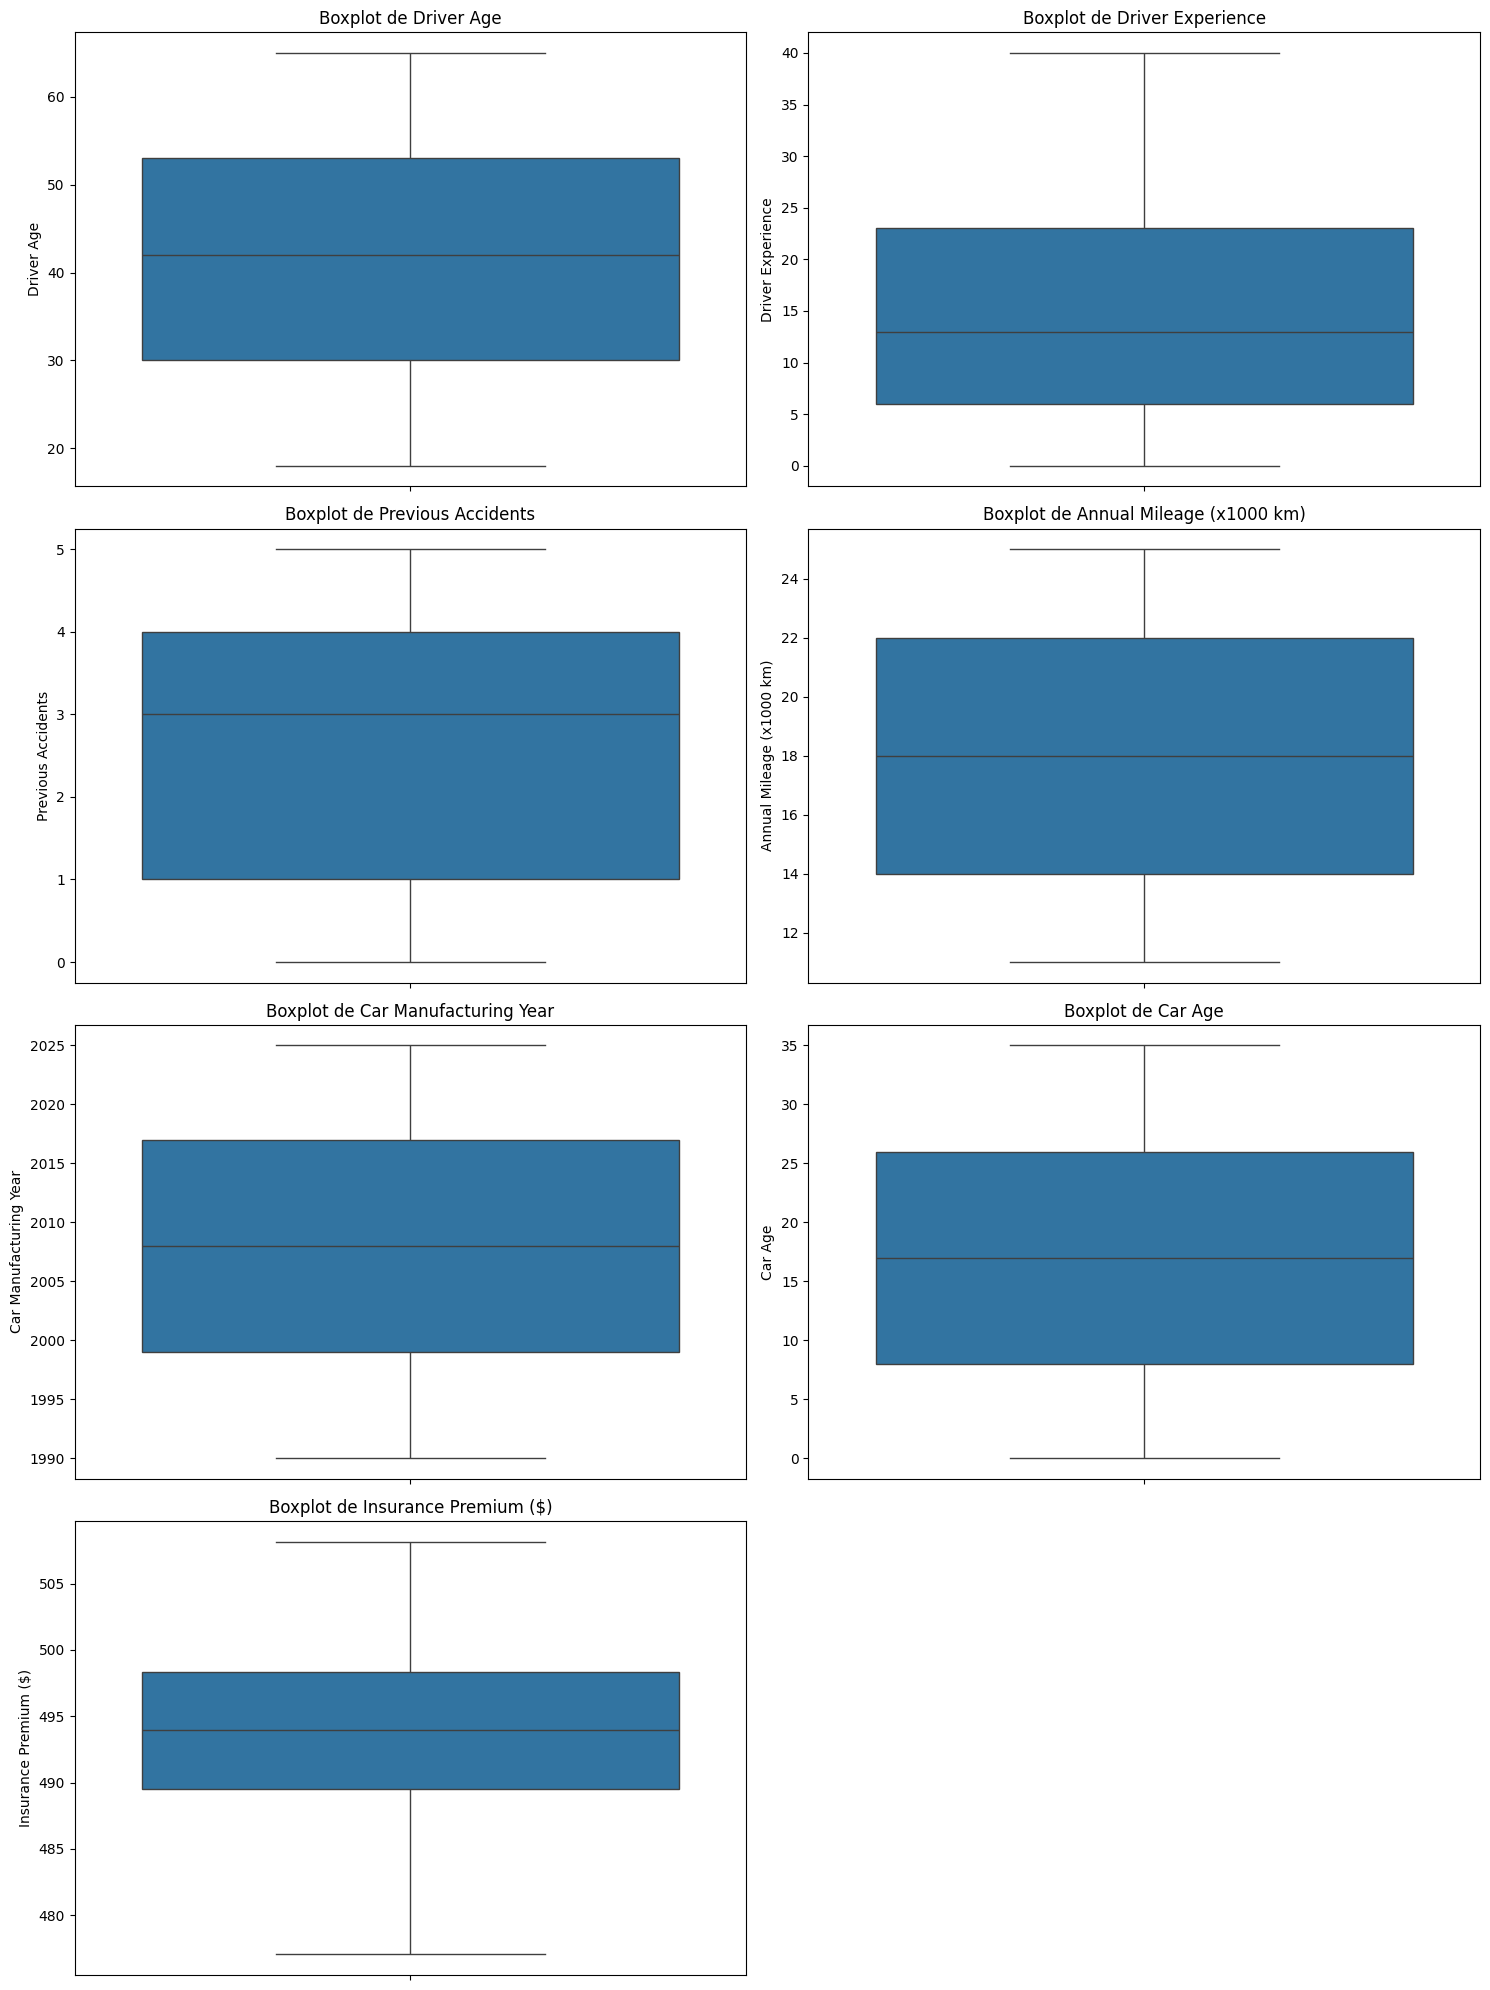

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# figura para os boxplots
num_plots = len(colunas_numericas)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(15, 5 * ((num_plots + 1) // 2)))
axes = axes.flatten()

# boxplot em cada eixo
for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(y=df[coluna], ax=axes[i])
    axes[i].set_title(f'Boxplot de {coluna}')
    axes[i].set_ylabel(coluna) # rótulo no eixo Y
    axes[i].set_xlabel('') # Limpa o rótulo do eixo X

# Remove subplots extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Os gráficos confirmam o que foi visto no describe, não existe outlier.

**Pipeline**


*   Aplicar lowercase em todas as colunas;
*   Excluir caracteres especiais dos nomes das colunas, incluindo o espaço em branco entre nome de colunas;
*   Tratamento dos outliers;
*   Tratamento dos missing values;
*   Lidar com dados categóricos;

*     Não existe missing values,
*     Não existem dados categóricos nas tabelas importadas.
*     Não existem outliers.

**Padronizando os nomes das colunas**

In [12]:
print("\n1. Limpeza Dataset Treino")

# Nomes das colunas
print(df.columns)
print("-" * 30)

# Transformações nos nomes das colunas
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_', regex=False)
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Nomes das colunas após a limpeza
print("Nomes das colunas após a limpeza:")
print(df.columns)

###############################################################

# Ver os nomes das colunas antes da limpeza

print("\n2. Limpeza Dataset Teste")

print(df_teste.columns)
print("-" * 30)

# Transformações nos nomes das colunas
df_teste.columns = df_teste.columns.str.lower()
df_teste.columns = df_teste.columns.str.replace(' ', '_', regex=False)
df_teste.columns = df_teste.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Nomes das colunas após a limpeza
print("Nomes das colunas após a limpeza:")
print(df_teste.columns)


1. Limpeza Dataset Treino
Index(['Driver Age', 'Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year', 'Car Age',
       'Insurance Premium ($)'],
      dtype='object')
------------------------------
Nomes das colunas após a limpeza:
Index(['driver_age', 'driver_experience', 'previous_accidents',
       'annual_mileage_x1000_km', 'car_manufacturing_year', 'car_age',
       'insurance_premium_'],
      dtype='object')

2. Limpeza Dataset Teste
Index(['Driver Age', 'Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year', 'Car Age',
       'Insurance Premium ($)'],
      dtype='object')
------------------------------
Nomes das colunas após a limpeza:
Index(['driver_age', 'driver_experience', 'previous_accidents',
       'annual_mileage_x1000_km', 'car_manufacturing_year', 'car_age',
       'insurance_premium_'],
      dtype='object')
